In [1]:
import os
import sys
import numpy as np
import re
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import pickle
from torch.nn.utils.rnn import pad_sequence
from unicodedata import normalize
from keras.preprocessing.text import Tokenizer
import keras
from torchvision import transforms, datasets
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pylab as pl
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
ordem_classes_antigo = ['área_eletricamente_inativa',
'Bloqueio_de_ramo_direito', 'Bloqueio_de_ramo_esquerdo',
'Bloqueio_de_ramo_direito_e_bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
'Bloqueio_intraventricular_inespecífico',
'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
'Sobrecarga_ventricular_esquerda_(critérios_de_voltagem)',
'Fibrilação_atrial', 'Flutter_atrial',
'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
'Bloqueio_atrioventricular_de_2°_grau_Mobitz_II',
'Bloqueio_atrioventricular_2:1', 'Bloqueio_atrioventricular_avançado',
'Bloqueio_atrioventricular_total',
'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
'Sistema_de_estimulação_cardíaca_normofuncionante',
'Sistema_de_estimulação_cardíaca_com_disfunção',
'Taquicardia_atrial_multifocal', 'Taquicardia_atrial',
'Taquicardia_supraventricular', 'Corrente_de_lesão_subendocárdica',
'Alterações_primárias_da_repolarização_ventricular',
'Extrassístoles_supraventriculares', 'Extrassístoles_ventriculares',
'Bradicardia_sinusal',
'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
'Alterações_da_repolarização_ventricular_atribuídas_à_ação_digitálica',
'Alterações_inespecíficas_da_repolarização_ventricular',
'Alterações_secundárias_da_repolarização_ventricular',
'Arritmia_sinusal',
'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
'Interferência_na_linha_de_base_que_não_impede_a_análise_do_ECG',
'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
'Traçado_com_qualidade_técnica_insuficiente',
'Possível_inversão_de_posicionamento_de_eletrodos',
'Baixa_voltagem_em_derivações_precordiais',
'Baixa_voltagem_em_derivações_periféricas',
'Bloqueio_atrioventricular_de_1°_grau',
'Bloqueio_de_ramo_direito_e_bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
'Desvio_do_eixo_do_QRS_para_direita',
'Desvio_do_eixo_do_QRS_para_esquerda',
'Dissociação_atrioventricular_isorrítmica',
'Distúrbio_de_condução_do_ramo_direito',
'Distúrbio_de_condução_do_ramo_esquerdo', 'Intervalo_PR_curto',
'Intervalo_QT_prolongado', 'Isquemia_subendocárdica',
'Progressão_lenta_de_R_nas_derivações_precordiais', 'Pausa_sinusal',
'Corrente_de_lesão_subepicárdica',
'Corrente_de_lesão_subepicárdica_-_provável_infarto_agudo_do_miocárdio_com_supradesnivelamento_de_ST',
'Repolarização_precoce', 'Ritmo_atrial_ectópico',
'Ritmo_atrial_multifocal', 'Ritmo_idioventricular_acelerado',
'Ritmo_juncional', 'Síndrome_de_Brugada', 'Sobrecarga_atrial_direita',
'Sobrecarga_atrial_esquerda', 'Sobrecarga_biatrial',
'Sobrecarga_biventricular', 'Sobrecarga_ventricular_direita',
'Sobrecarga_ventricular_esquerda(_critérios_de_voltagem)',
'Taquicardia_sinusal', 'Taquicardia_ventricular_não_sustentada',
'Taquicardia_ventricular_sustentada',
'Suspeita_de_Síndrome_de_Brugada_repetir_V1-V2_em_derivações_superiores',
'Taquicardia_juncional', 'Batimento_de_escape_atrial',
'Batimento_de_escape_supraventricular', 'Batimento_de_escape_juncional',
'Batimento_de_escape_ventricular']

ordem_classes = ['área_eletricamente_inativa',
 'Bloqueio_de_ramo_direito',
 'Bloqueio_de_ramo_esquerdo',
 'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
 'Fibrilação_atrial',
 'Flutter_atrial',
 'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
 'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
 'Sistema_de_estimulação_cardíaca_normofuncionante',
 'Taquicardia_atrial_multifocal',
 'Taquicardia_supraventricular',
 'Alterações_primárias_da_repolarização_ventricular',
 'Extrassístoles_supraventriculares',
 'Extrassístoles_ventriculares',
 'Bradicardia_sinusal',
 'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
 'Alterações_inespecíficas_da_repolarização_ventricular',
 'Alterações_secundárias_da_repolarização_ventricular',
 'Arritmia_sinusal',
 'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
 'Possível_inversão_de_posicionamento_de_eletrodos',
 'Bloqueio_atrioventricular_de_1°_grau',
 'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
 'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
 'Desvio_do_eixo_do_QRS_para_direita',
 'Desvio_do_eixo_do_QRS_para_esquerda',
 'Distúrbio_de_condução_do_ramo_direito',
 'Distúrbio_de_condução_do_ramo_esquerdo',
 'Intervalo_PR_curto',
 'Intervalo_QT_prolongado',
 'Isquemia_subendocárdica',
 'Progressão_lenta_de_R_nas_derivações_precordiais',
 'Ritmo_atrial_ectópico',
 'Sobrecarga_atrial_esquerda',
 'Taquicardia_sinusal']

In [3]:
#ids_achados   = pd.read_csv('../../greenZoneIds.csv', index_col = 0)
#resultLabels   = pd.read_csv('../../../data/resultLabels.csv')
#baseC = pd.read_csv("../../../data/DATA_LAUDOS_TEXTO_formato1", sep = ";")

In [3]:
REBUILD_DATA = False
BIDIRECTIONAL = True
TOP_WORDS = 10000
EPOCHS = 30
BATCH_SIZE = 256

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on a GPU :D")
else:
    device = torch.device("cpu")
    print("Running on a CPU :/")

Running on a GPU :D


In [7]:
# Oi, Derick
# To comentando como diálogo porque acho mais fácil explicar o código assim. Se o comentário estiver errado é pq essa é a parte que eu entendi errado.
class Net(nn.Module):
    def __init__(self, seq_size):
        
        print("Building NN...")
        embedding_dim = 128
        lstm_out_dim = 128
        num_embeddings = TOP_WORDS
        num_of_classes = 35
        
        super().__init__()
        #Camada de Embedding, o padding_idx é um argumento que eu descobri que é usada para falar para a camada que os números no fim de cada vetor são apenas lixo
        self.l1 = nn.Embedding(num_embeddings, embedding_dim, padding_idx = 0)
        #Eu não entendo muito bem o que essa camada faz. Pelo que eu entendi é algo probabilístico. Mas ela n altera o shape.
#         self.l2 = nn.Dropout(p=0.4)
        #A LSTM recebe os Embeddings e cospe o mesmo número de vetores que eu passei para ela. Não sei se eu deveria alterar o número de camadas da LSTM.
        #Se usar menos de 2 não dá pra colocar Dropout pq o Dropout é aplicado em todas as camadas menos na última.
        self.l3 = nn.LSTM(embedding_dim, lstm_out_dim, dropout = 0.2, num_layers = 2, bidirectional = BIDIRECTIONAL)
        #É o seguinte. Como as dimensões de entrada são estáticas, eu adicionei elas manualmente na camada linear para conseguir fazer o flatten.
        self.l4 = nn.Flatten()
        #Dimensao do vetor de entrada X dimensao da lstm
        self.l5 = nn.Linear(seq_size * lstm_out_dim * (2 if BIDIRECTIONAL else 1), num_of_classes)
        
    
    def forward(self, x):
        #Aqui eu só to passando o input pelas camadas mesmo
        x    = self.l1(x)
#         x    = self.l2(x)
        #A camada de LSTM retorna uma tupla, o vetor que eu quero é a primeira posição da tupla, por isso recebo assim.
        #Acho que a segunda camada da LSTM só é util ao passar de uma camada da LSTM para a outra.
        x, _ = self.l3(x)
        x    = self.l4(x)
        x    = self.l5(x)
        #Aqui eu aplico o softmax. Especifico o número de dimensões para ser um e tal. Não sei o que não está funcionando :c.
        x    = F.softmax(x, dim = 1)
            
        return x             

In [8]:
def clean_text(x):
    if type(x) is str:
        pattern = r'[^a-zA-z0-9!.?,:\s]'
        x = normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII')
        x = re.sub(pattern, '', x)
        return x
    else:
        return ""

In [9]:
def tokenize(text, tokenizer, fit = False):
    # Creating vocabulary
    if fit:
        tokenizer.fit_on_texts(text)
    # Vectorizing text
    X   = tokenizer.texts_to_sequences(text)
    return X

In [12]:
with open("../../light_data/pytorch_tokenizer_10000.pickle", 'rb') as handle:
    tokenizer = pickle.load(handle)

In [21]:
gold = pd.read_csv("../../light_data/gold_standard.csv")

In [44]:
#Atribua aqui seu teste
test_X       = np.load("../../../data/training_data/training_data_X_10000.npy", allow_pickle = True)
labels       = np.load('../../../data/resultados/scores/allLabels.npy')
greenZoneIdx = np.load('../../light_data/greenZoneIndex.npy')
labels       = [labels[i] for i in greenZoneIdx]
test_y       = labels[:len(test_X)]
# test_X_temp = [torch.Tensor(i).type(torch.LongTensor) for i in test_X_temp]

In [45]:
test_X  = [torch.Tensor(i).type(torch.LongTensor) for i in test_X]
test_X  = pad_sequence(test_X, batch_first=True).type(torch.LongTensor)
test_y  = torch.Tensor(test_y)

In [48]:
net = Net(423)
net.load_state_dict(torch.load("../../../data/trained_models/pytorch_checkpoint_3.pth",  map_location=torch.device('cuda:0')))
net.eval()

Building NN...


Net(
  (l1): Embedding(10000, 128, padding_idx=0)
  (l3): LSTM(128, 128, num_layers=2, dropout=0.2, bidirectional=True)
  (l4): Flatten()
  (l5): Linear(in_features=108288, out_features=35, bias=True)
)

In [49]:
finalResult = torch.Tensor()
size = 64
for i in tqdm(range(0, test_X.size()[0], size)):
    with torch.no_grad():
        result      = net(test_X[i: min(i+size, test_X.size()[0])])
    finalResult = torch.cat((finalResult, result), 0)

 11%|█         | 2335/21818 [43:48<6:05:27,  1.13s/it]


KeyboardInterrupt: 

In [ ]:
y_score = np.array(finalResult)

In [ ]:
np.save("predictions.npy", y_score)

In [8]:
y_test =  np.load("../../../data/training_data/training_data_y.npy")
y_score = np.load("../../../data/test_results/in_training/predictions.npy")
y_test = y_test[:-50000]

In [19]:
#Results've been calculated.
#Lets analyze em

#This is a function to check manually the performance of the network
def analyze(n):
    y_bin = []
    
    for row in y_score:
        ans = []
        for i in range(74):
            if row[i] > limits[i]:
                ans.append(1)
            else:
                ans.append(0)
        y_bin.append(np.array(ans))
    y_bin = np.array(y_bin)
    
    tr = y_test[n]
    pr = y_bin[n]
    text = gold["texto"][n]
    print("Texto:")
    print(text)
    print()
    print("Classes no texto:")
    for i in range(74):
        if(tr[i] == 1):
            print(ordem_classes[i])
    
    print()
    print("Classes Predizidas:")
    for i in range(74):
        if(pr[i] == 1):
            print(ordem_classes[i])

In [18]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#Function to turn score in binary
#Here the thresholds must be a list of 74 numbers
def getMetrics(y_test, y_score, thresholds):
    
    #First we turn into binary
    print("Creating y_bin...")
    y_bin = [[row[i] > thresholds[i] for i in range(74)] for row in y_score]
    y_bin = np.array(y_bin)
    
    #Then we calculate
    target_names = ["(" + ordem_classes[i] + ") Class" + str(i) for i in range(74)]
    precision = dict()
    recall = dict()
    f1 = dict()
    sup = dict()
    print("Calculating...")
    for i in range(74):
        precision[i], recall[i], f1[i], sup[i] = precision_recall_fscore_support(y_test[:,i], y_bin[:,i], average = 'binary')
    return precision, recall, f1, sup

In [56]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(74):
    fpr[i], tpr[i], thresholds[i] = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])



  0%|          | 0/74 [00:00<?, ?it/s]

  1%|▏         | 1/74 [00:00<00:13,  5.33it/s]

  3%|▎         | 2/74 [00:00<00:13,  5.28it/s]

  4%|▍         | 3/74 [00:00<00:13,  5.45it/s]

  5%|▌         | 4/74 [00:00<00:12,  5.60it/s]

  7%|▋         | 5/74 [00:00<00:12,  5.72it/s]

  8%|▊         | 6/74 [00:01<00:11,  5.72it/s]

  9%|▉         | 7/74 [00:01<00:11,  5.76it/s]

 11%|█         | 8/74 [00:01<00:11,  5.78it/s]

 12%|█▏        | 9/74 [00:01<00:11,  5.82it/s]

 14%|█▎        | 10/74 [00:01<00:11,  5.80it/s]

 15%|█▍        | 11/74 [00:01<00:10,  5.73it/s]

 16%|█▌        | 12/74 [00:02<00:10,  5.79it/s]

 18%|█▊        | 13/74 [00:02<00:10,  5.75it/s]

 19%|█▉        | 14/74 [00:02<00:10,  5.74it/s]

 20%|██        | 15/74 [00:02<00:10,  5.74it/s]

 22%|██▏       | 16/74 [00:02<00:09,  5.80it/s]

 23%|██▎       | 17/74 [00:02<00:10,  5.62it/s]

KeyboardInterrupt: 

In [15]:
import math
#Tá é o seguinte
#Eu to pressupondo q se eu minimizar a distancia da curva ROC no ponto superior esquerdo eu vou achar o melhor threshold possivel
#É essa a teoria
limits = []
for j in range(74):
    dist = 2
    idist = 0
    for i in range(len(thresholds[j])):
        x = fpr[j][i]
        y = 1 - tpr[j][i]
        distat = math.sqrt((x * x) + (y * y))
        if(distat < dist):
            idist = i
            dist = distat
    limits.append(thresholds[j][idist])
#Funcionou bem mal :c

In [26]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
limits = [0.01 for i in range(74)]
#z = 0.1
#while(z < 1):
precision, recall, f1, sup = getMetrics(y_test, y_score, limits)
#   z += 0.1
f1 = sorted(f1.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(columns = ["Class", "Precision", "Recall", "F1"])
for row in f1:
    n = row[0]
    new_row = {'Class': str(ordem_classes[n]), 'Precision': precision[n], 'Recall': recall[n], 'F1': row[1]}
    df = df.append(new_row, ignore_index = True)
df = df.set_index("Class")

Creating y_bin...
Calculating...


In [38]:
df

,Precision,Recall,F1
Class,,,
Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise,0.991570,0.997879,0.994715
Alterações_inespecíficas_da_repolarização_ventricular,0.981924,0.966622,0.974213
Sistema_de_estimulação_cardíaca_normofuncionante,0.933333,0.993208,0.962340
Progressão_lenta_de_R_nas_derivações_precordiais,0.928641,0.995807,0.961052
Intervalo_PR_curto,0.935757,0.986631,0.960521
Sobrecarga_ventricular_esquerda_(critérios_de_voltagem),0.913551,0.997449,0.953659
Baixa_voltagem_em_derivações_periféricas,1.000000,0.909091,0.952381
Batimento_de_escape_juncional,0.980769,0.894737,0.935780
Ritmo_atrial_ectópico,0.922937,0.944217,0.933456


In [39]:
df.to_csv("results_training2.csv")

In [ ]:
np.shape(y_test[:,0])

In [ ]:
for row in finalResult[:,j]:
            ans = []
            if row > threshold:
                ans.append(1)
            else:
                ans.append(0)

In [21]:
limits = []
for j in tqdm(range(74)):
    bigf1 = 0
    threshold = 0.1
    while(threshold < 1):
        y_bin = []
        y_bin = [row > threshold for row in y_score[:,j][:50000]]
        y_bin = np.array(y_bin)
        precision, _, f1, _ = precision_recall_fscore_support(y_test[:50000,j], y_bin, average = 'binary')
        
        if(f1 > bigf1 and precision > 0):
            bigf1 = f1
            maxi = threshold
        threshold += 0.1
    limits.append(maxi)

100%|██████████| 74/74 [15:28<00:00, 14.06s/it]


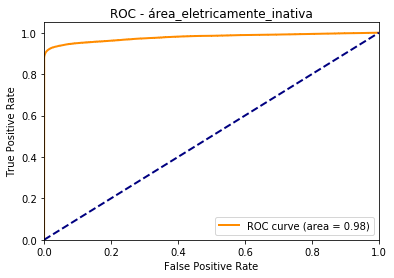

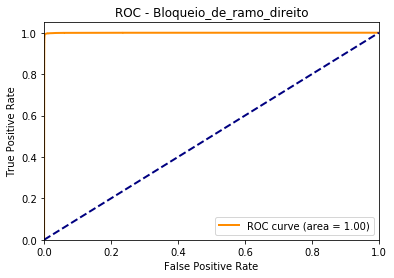

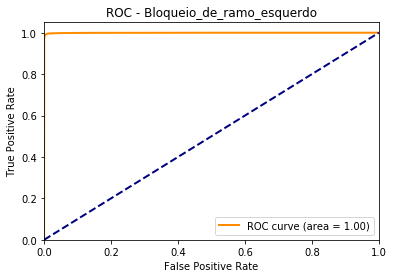

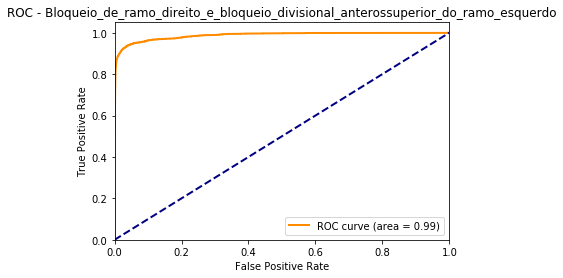

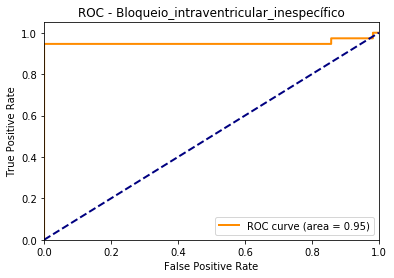

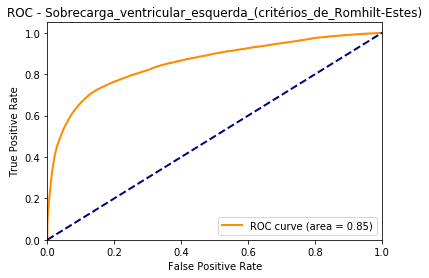

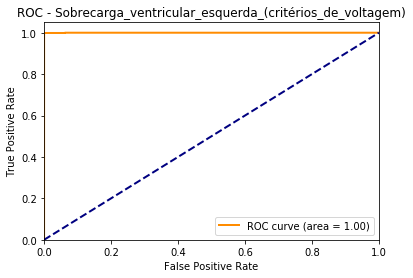

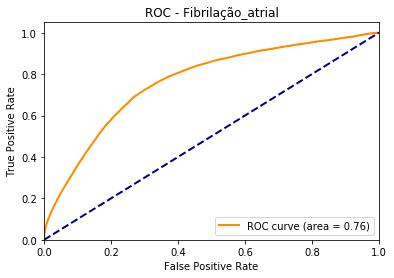

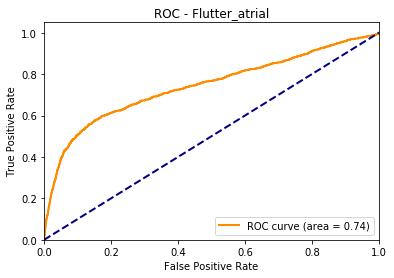

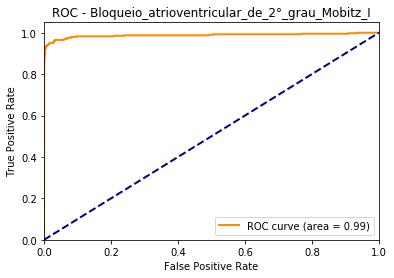

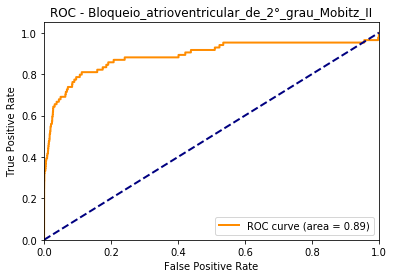

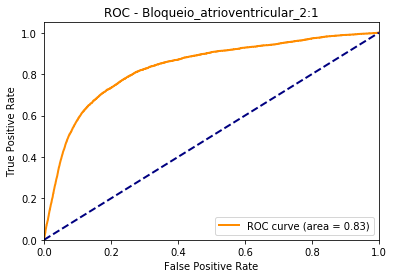

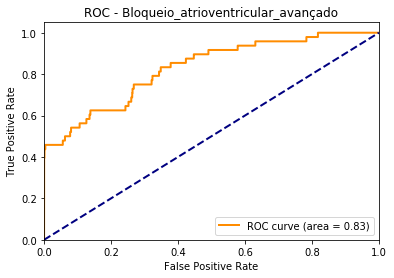

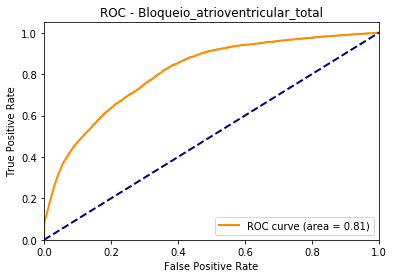

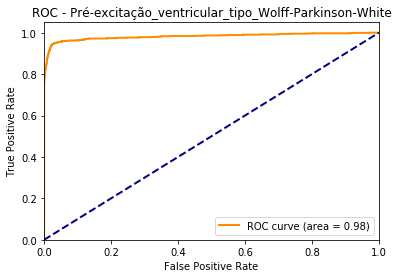

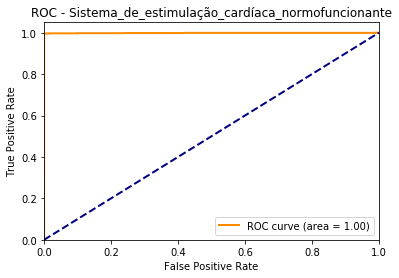

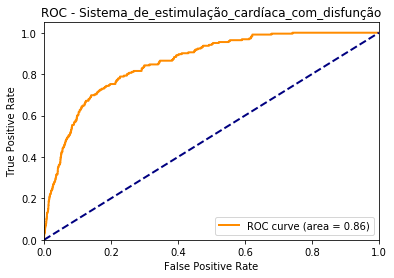

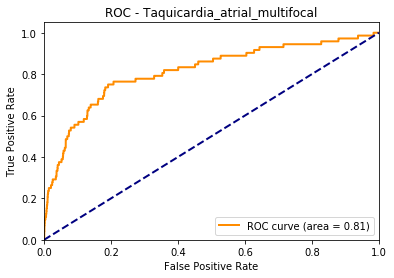

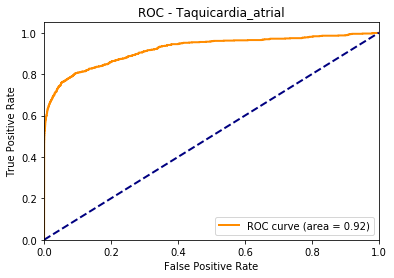

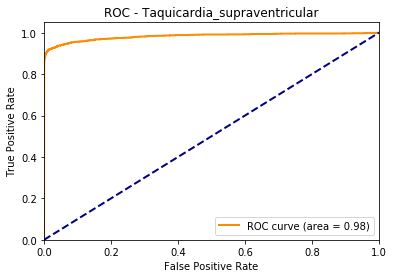

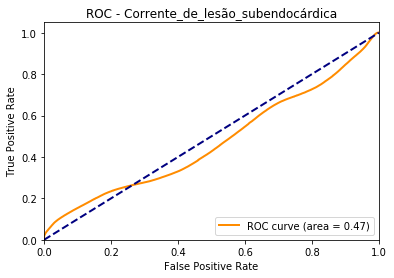

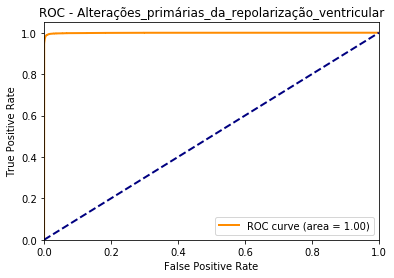

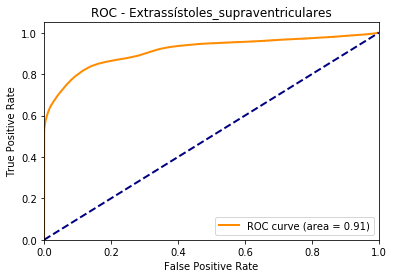

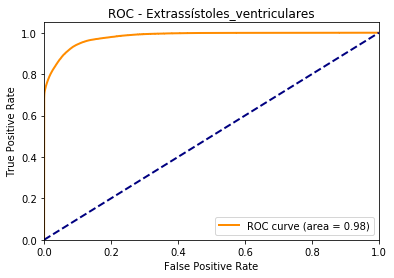

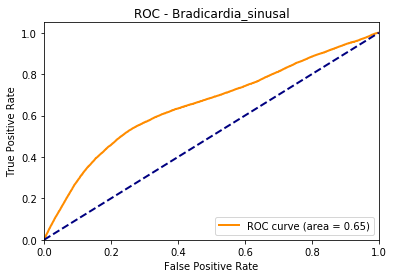

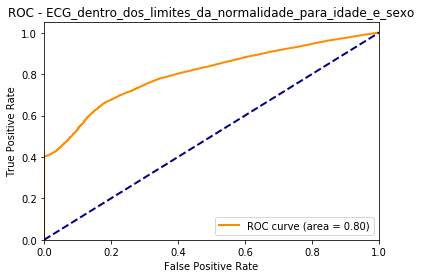

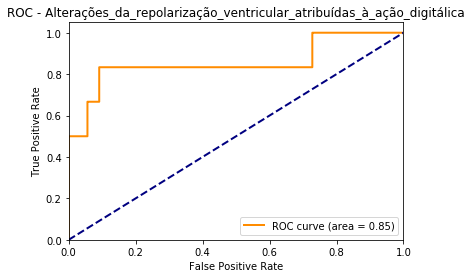

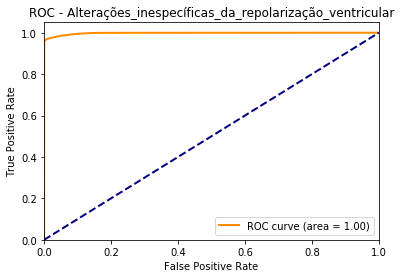

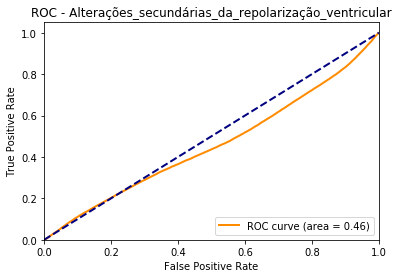

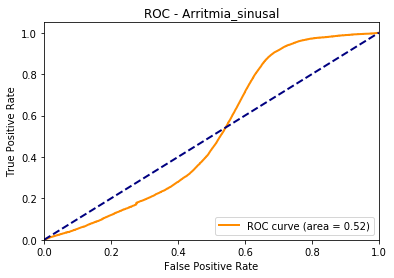

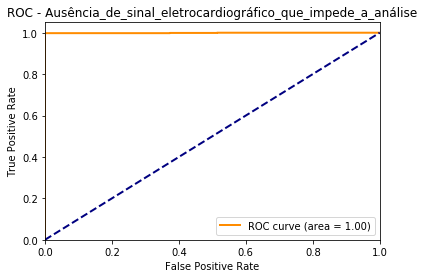

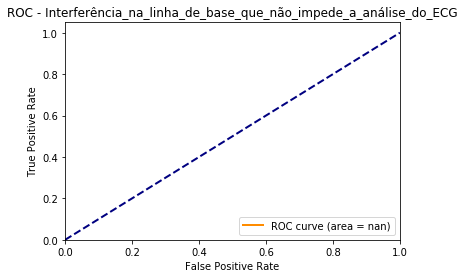

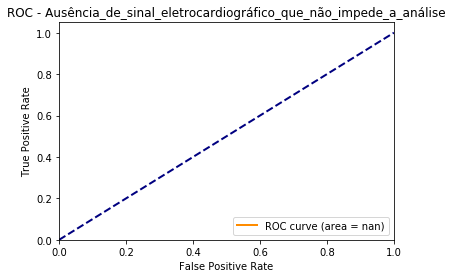

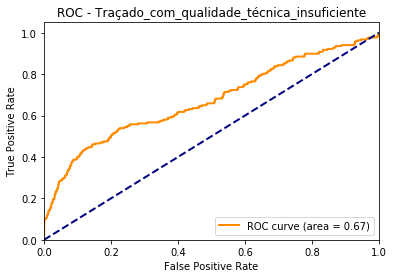

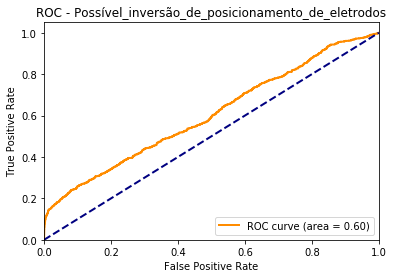

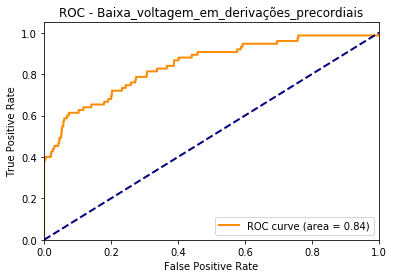

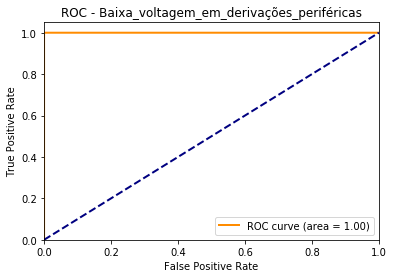

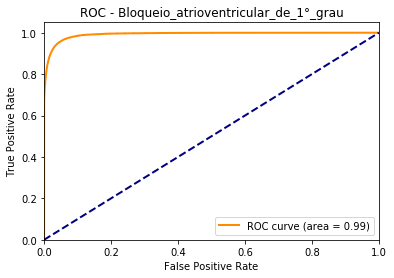

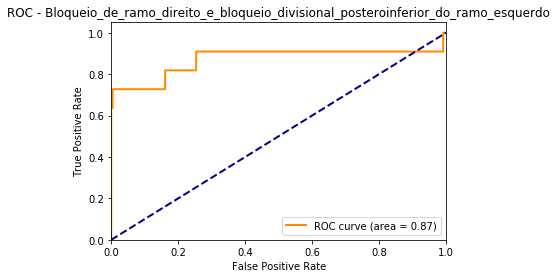

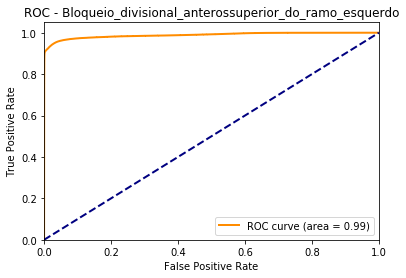

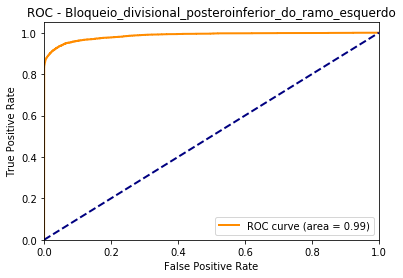

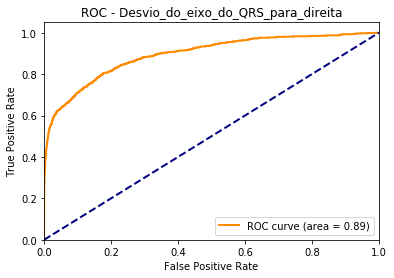

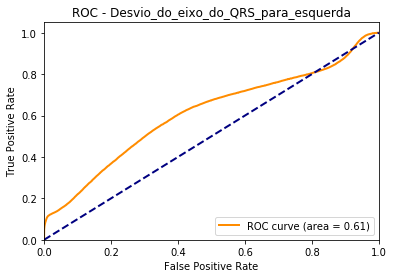

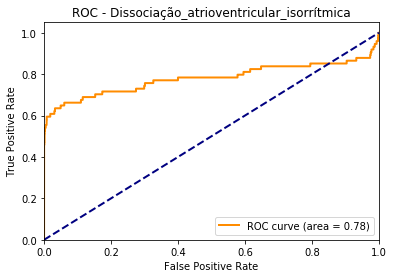

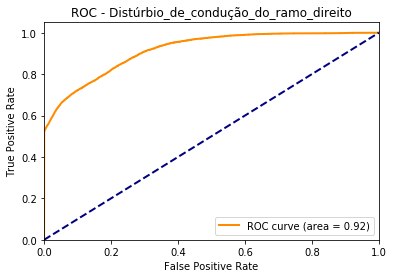

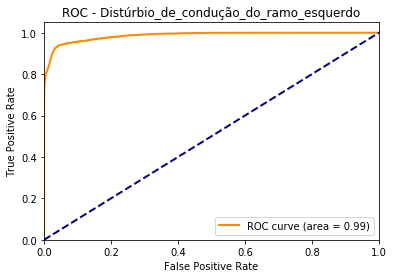

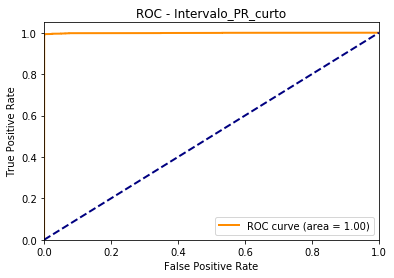

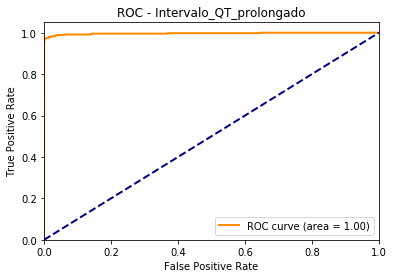

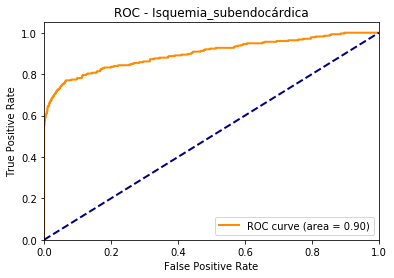

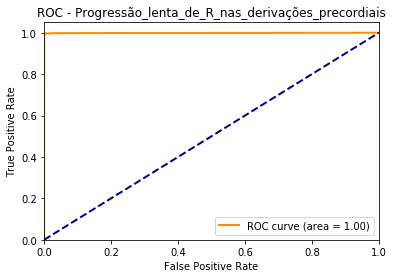

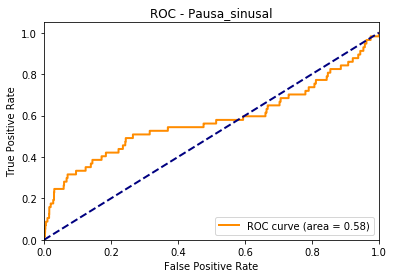

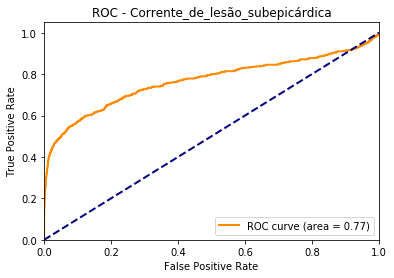

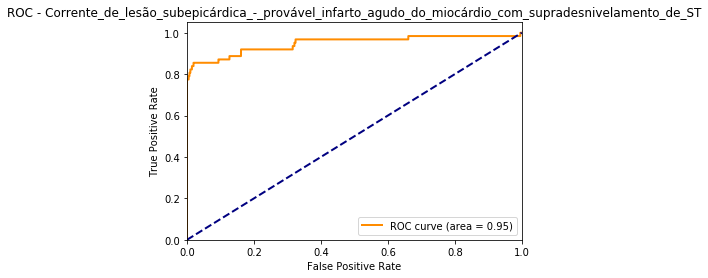

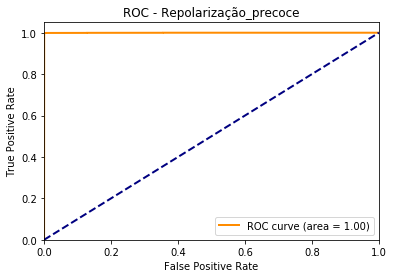

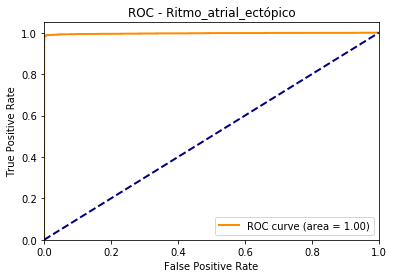

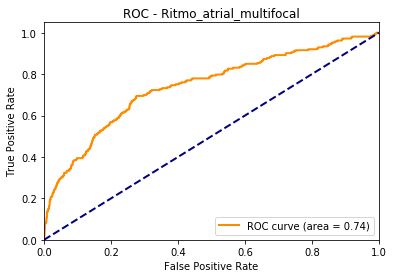

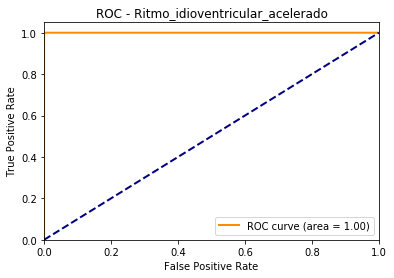

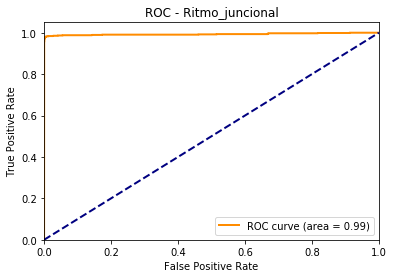

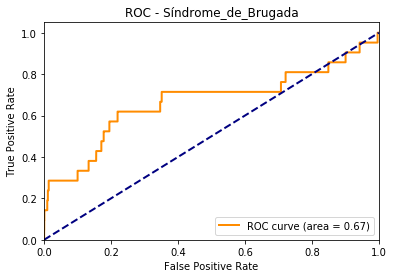

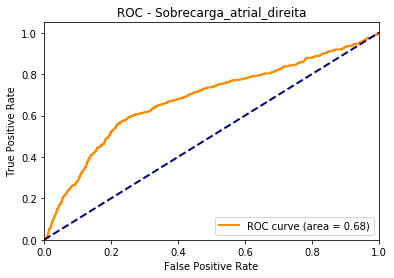

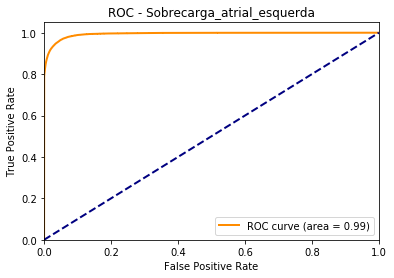

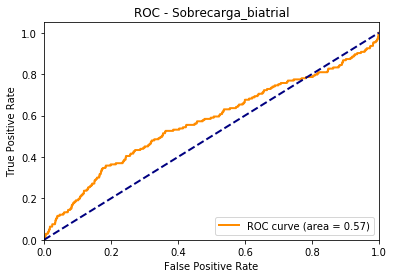

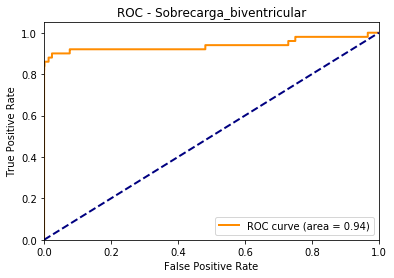

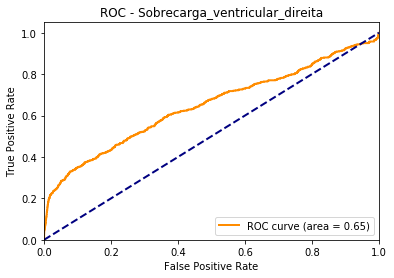

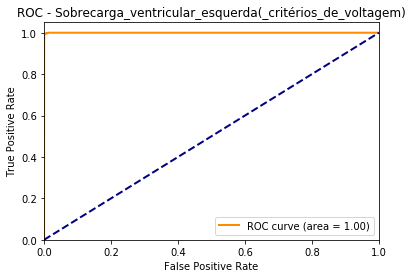

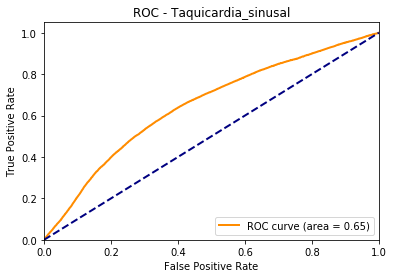

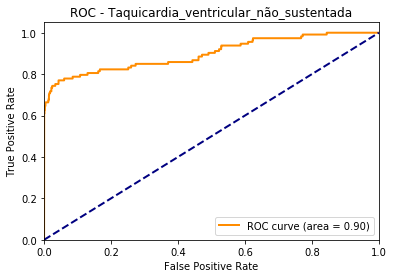

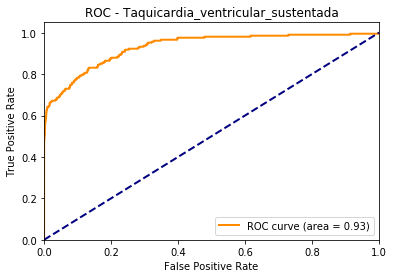

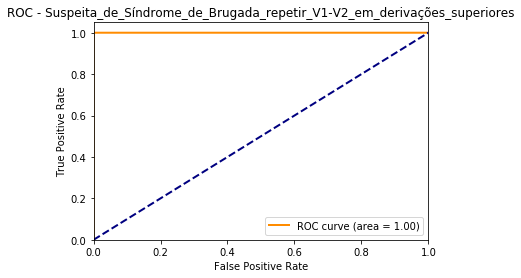

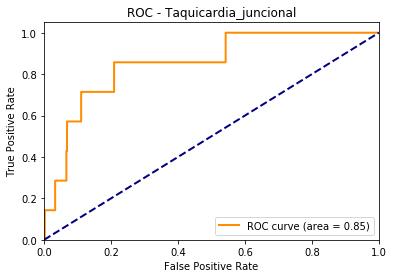

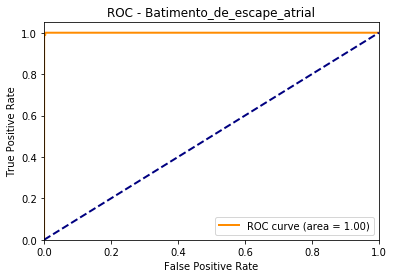

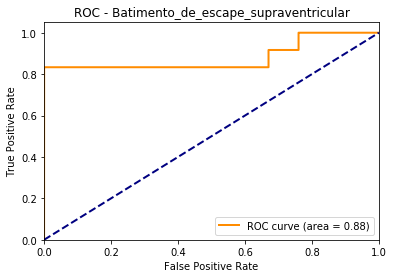

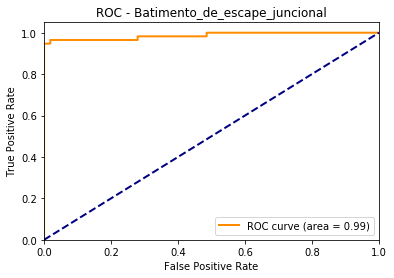

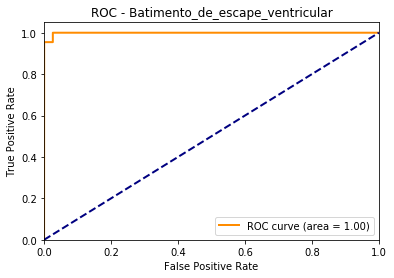

In [27]:
#ROC curves
for i in range(74):
    nClass = i
    plt.figure()
    lw = 2
    plt.plot(fpr[nClass], tpr[nClass], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nClass])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + ordem_classes[nClass])
    plt.legend(loc="lower right")
#     plt.savefig('../../test_data/testROC/' + ordem_classes[nClass] + '.png')
    plt.show()